# Correlated data in nature

0.8604149377143467


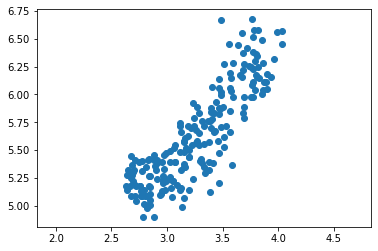

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

grains = np.loadtxt('../data/Seeds Dataset/seeds_dataset.txt', delimiter = "\t")

# Assign the 0th column of grains: width
width = grains[:,4]

# Assign the 1st column of grains: length
length = grains[:,3]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)


# Decorrelating the grain measurements with PCA

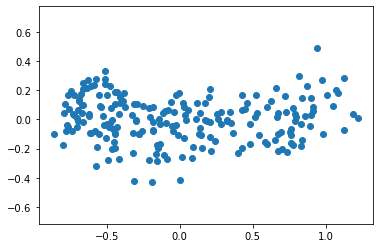

-6.591949208711867e-17


In [15]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

grains = np.loadtxt('../data/Seeds Dataset/seeds_dataset.txt', delimiter = "\t")
grains_ = grains[:,3:5]

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains_)

# # Assign 0th column of pca_features: xs
xs = pca_features[:,0]


# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation_, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation_)

<!-- Variance of the PCA features -->

# Variance of the PCA features

Text(0, 0.5, 'variance')

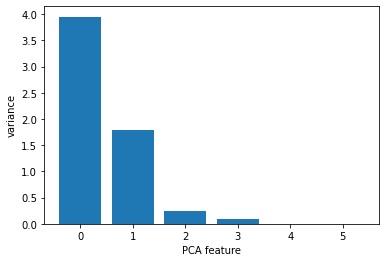

In [27]:
import numpy as np
import pandas as pd

# reading data
samples = pd.read_csv('../data/fishcatch dataset/fishcatch.txt')
samples = samples.iloc[:,1:].values

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')



# Dimension reduction of the fish measurements

In [32]:
# Import PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(samples)
scaled_samples = scaler.transform(samples)

# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(84, 2)


# A tf-idf word-frequency array

In [33]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ['cats say meow','dogs say woof','dogs chase cats']

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


# Clustering Wikipedia

In [39]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from scipy.sparse import csr_matrix
import pandas as pd

# an array articles of tf-idf word-frequencies of some popular Wikipedia articles, 
# and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.
df = pd.read_csv('../data/Wikipedia articles/wikipedia-vectors.csv')

# The reason for taking this transpose is that without it, 
# there would be 13,000 columns (corresponding to the 13,000 words in the file), 
# which is a lot of columns for a CSV to have.
articles = csr_matrix(df.transpose())
titles = list(df.columns)

print(articles.shape)

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components = 50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

# Fit the pipeline to articles
pipeline.fit(articles)

print(articles.shape)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values(by = 'label'))



(61, 13125)
(61, 13125)
    label           article
30      0  Jennifer Aniston
29      0     Anne Hathaway
28      0    Dakota Fanning
27      0        Mila Kunis
26      0     Russell Crowe
..    ...               ...
43      5       Doxycycline
42      5       Hepatitis B
41      5       Tonsillitis
49      5        Gabapentin
46      5       Hepatitis C

[61 rows x 2 columns]
